<a href="https://colab.research.google.com/github/ftkovr9k/MAGIC-gamma-hadron-classifier/blob/main/MAGIC_gamma_hadron_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Adding Columns and converting Gamma & Hadron classes to numeric values.

In [3]:
#Create columns
cols = ["fLength",
"fWidth",
"fSize",
"fConc",
"fConc1",
"fAsym",
"fM3Long",
"fM3Trans",
"fAlpha",
"fDist",
"class"]

#Add Column name

#Read from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Magic Gamma-Hadron data set/magic04.data', names=cols)

#Read from temporary space in Colab
#df = pd.read_csv("magic04.data", names=cols)

#Convert classes to numeric
df["class"] = (df["class"] == "g").astype(int)

#Remove rows with missing values
df.dropna(inplace=True)

#Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

Drawing Histograms to visualize

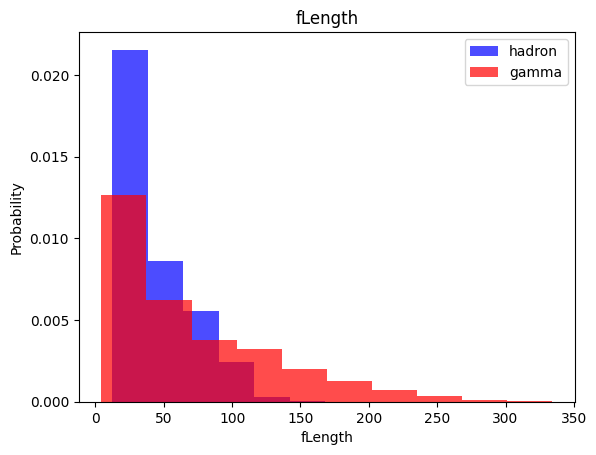

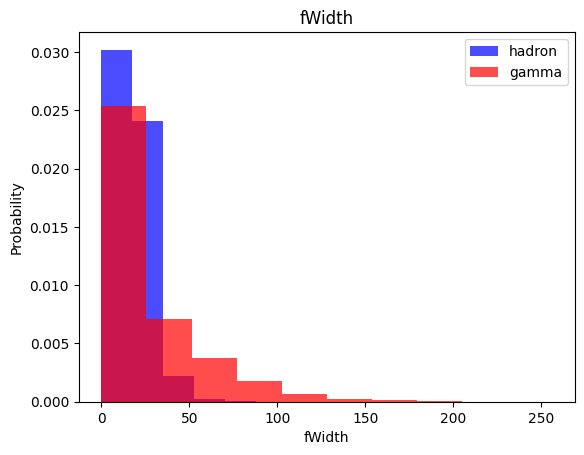

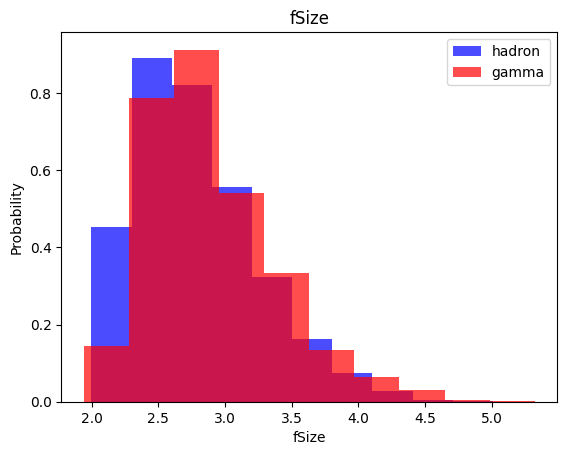

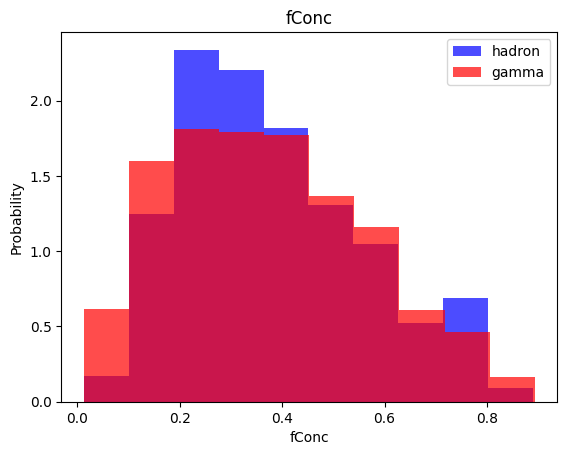

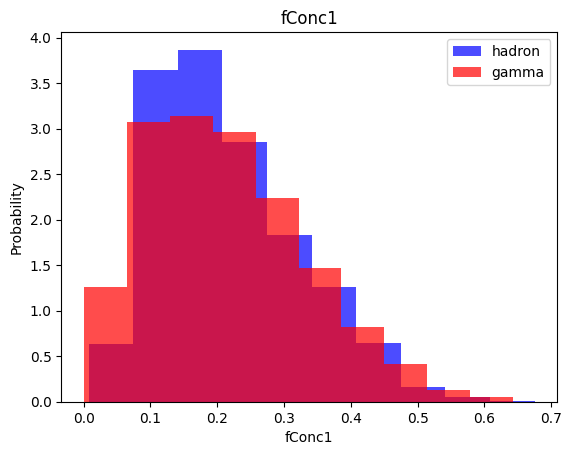

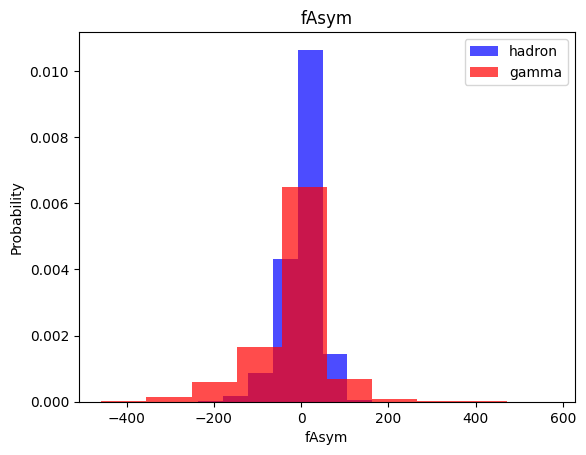

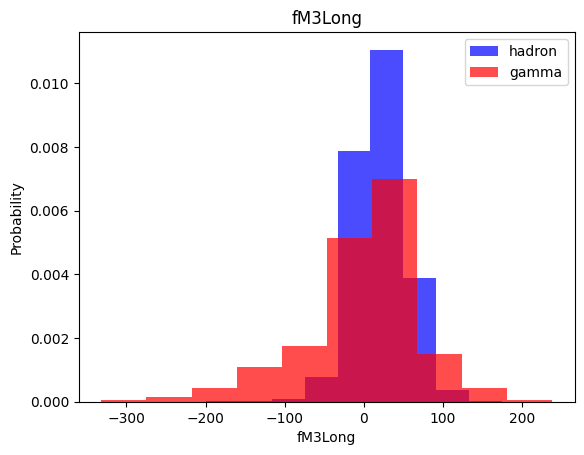

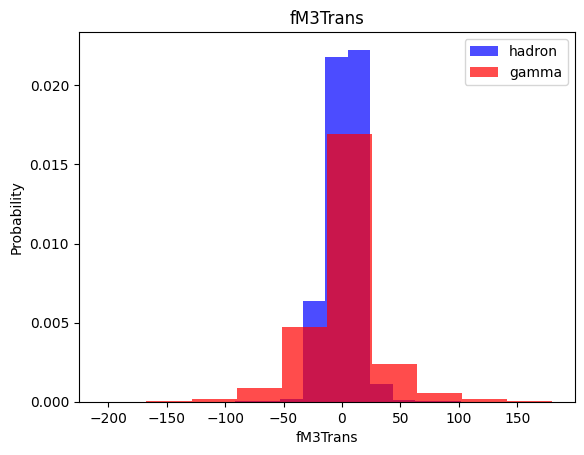

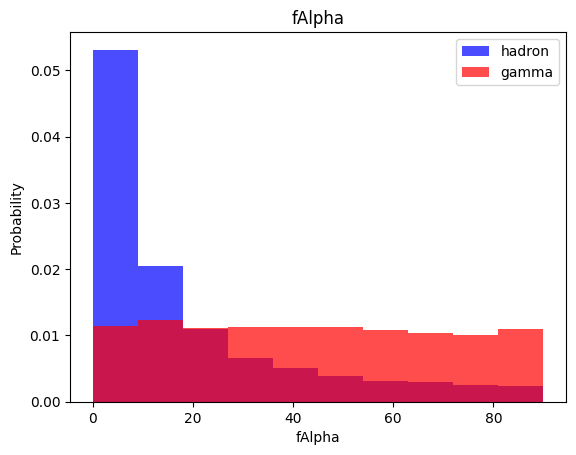

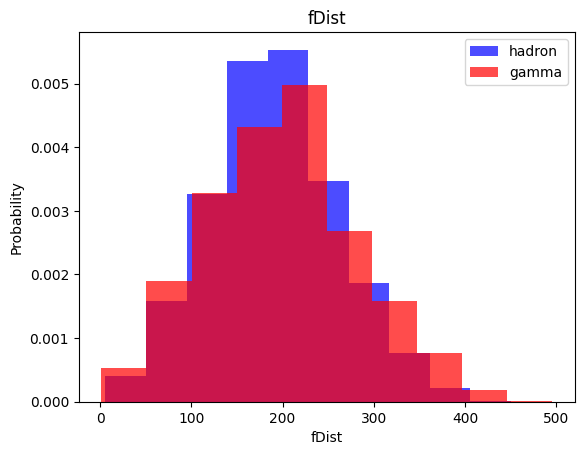

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label="hadron", alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label="gamma", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Split data set into Train, Validation and Test

In [25]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

print(train.shape)
print(valid.shape)
print(test.shape)

(11343, 11)
(3781, 11)
(3781, 11)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scale of data is currently way off. Create a function to scale

In [6]:
def scale_data(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


There is a huge gap in the train data set between hadron and gamma

In [7]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

7335
4008


Increase the number of hadron. There is a overample parameter in the scale_data() function.

In [8]:
train, X_train, y_train =  scale_data(train, oversample=True)
valid, X_valid, y_valid =  scale_data(valid, oversample=False)
test, X_test, y_test =  scale_data(test, oversample=False)

Visualize again

In [9]:
print(sum(y_train == 1)) #gamma
print(sum(y_train == 0)) #hadron


7335
7335


**Preprocessing is complete. Running different models.**

k-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1275
           1       0.87      0.86      0.86      2506

    accuracy                           0.82      3781
   macro avg       0.80      0.80      0.80      3781
weighted avg       0.82      0.82      0.82      3781



Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52      1275
           1       0.75      0.89      0.82      2506

    accuracy                           0.73      3781
   macro avg       0.71      0.66      0.67      3781
weighted avg       0.72      0.73      0.72      3781



Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1275
           1       0.85      0.82      0.84      2506

    accuracy                           0.79      3781
   macro avg       0.76      0.77      0.77      3781
weighted avg       0.79      0.79      0.79      3781



Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

In [17]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1275
           1       0.90      0.89      0.89      2506

    accuracy                           0.86      3781
   macro avg       0.84      0.84      0.84      3781
weighted avg       0.86      0.86      0.86      3781



**Running Neural Network models**

In [18]:
import tensorflow as tf

In [35]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [38]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, bs, e):

  #Define the neural network
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    #Dropout layer prevents overfitting
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  #Compile the neural network
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  #Train the model
  history = nn_model.fit(
    X_train, y_train, epochs=e, batch_size=bs, validation_split=0.2, verbose=0
  )

  return nn_model, history

Run on various number of nodes, dropout_prob, learning_rate & batch_size

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.01, batch_size = 32


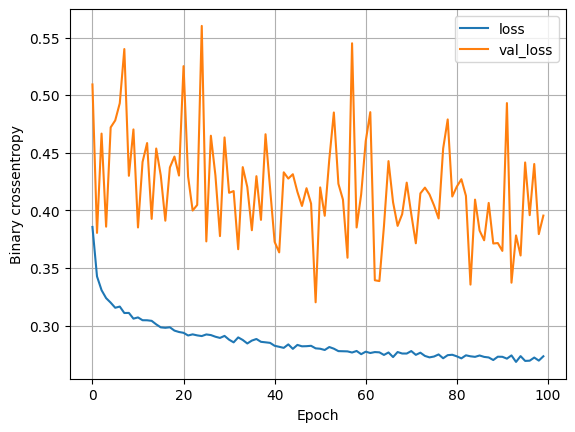

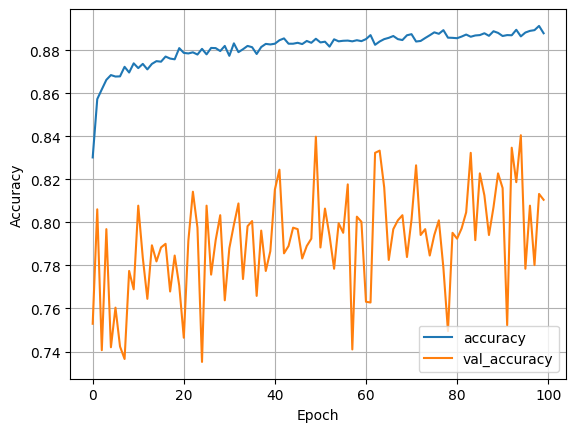

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8695 - loss: 0.3282
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.01, batch_size = 64


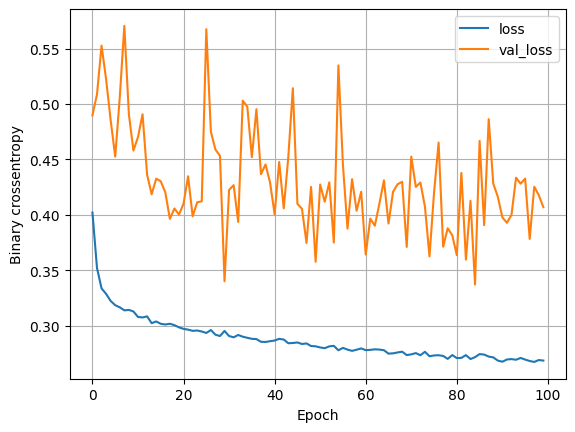

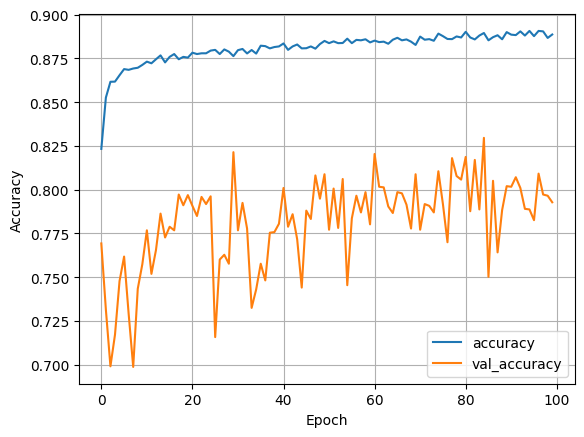

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8635 - loss: 0.3293
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.01, batch_size = 128


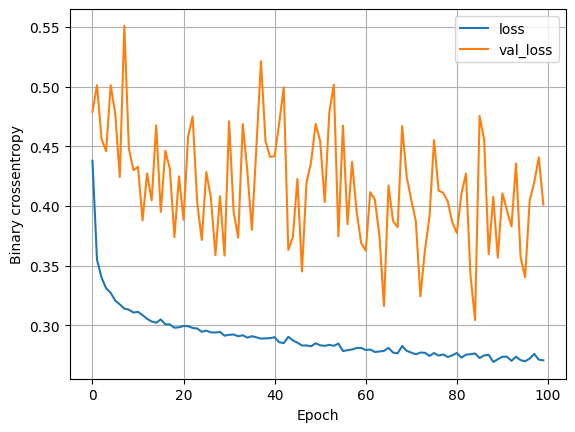

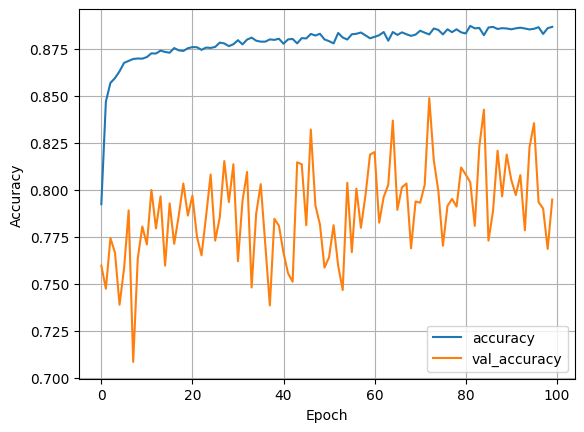

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3384
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.005, batch_size = 32


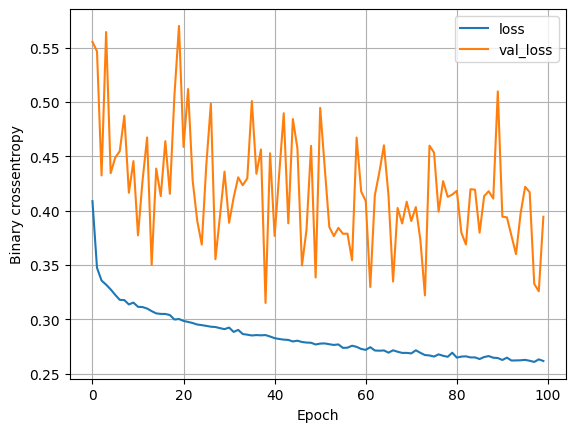

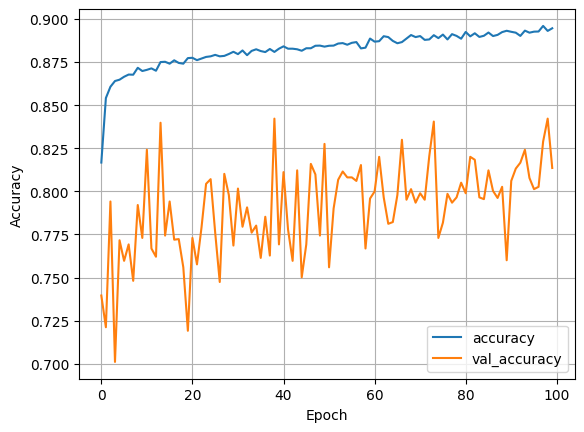

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3180
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.005, batch_size = 64


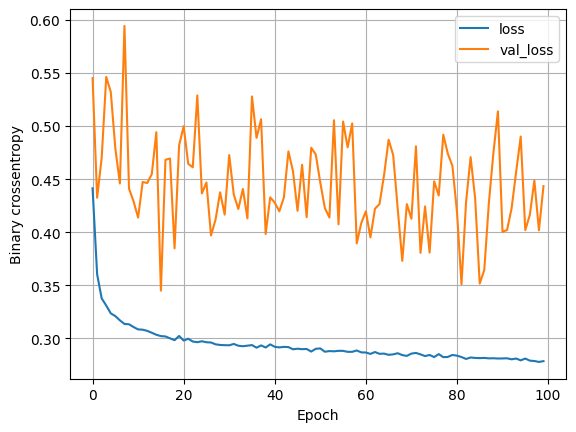

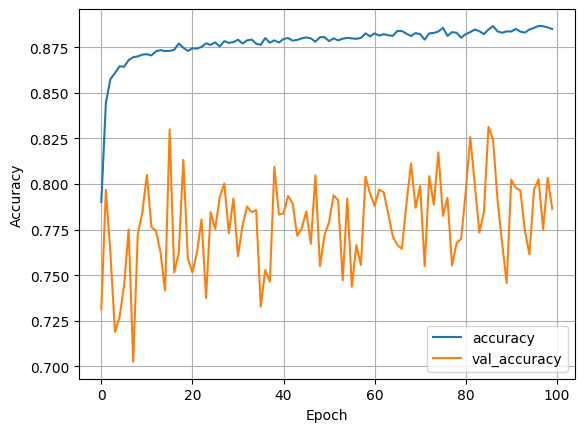

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3285
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.005, batch_size = 128


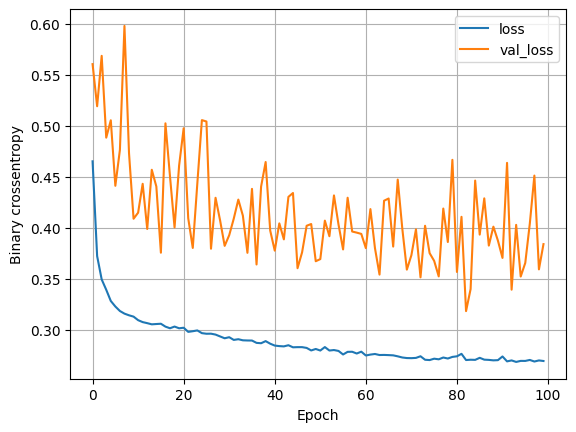

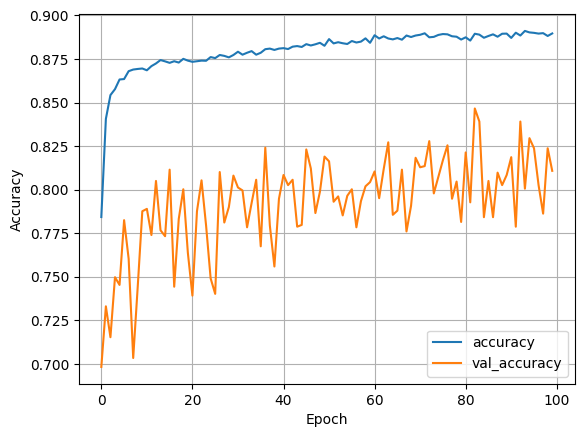

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3204
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.001, batch_size = 32


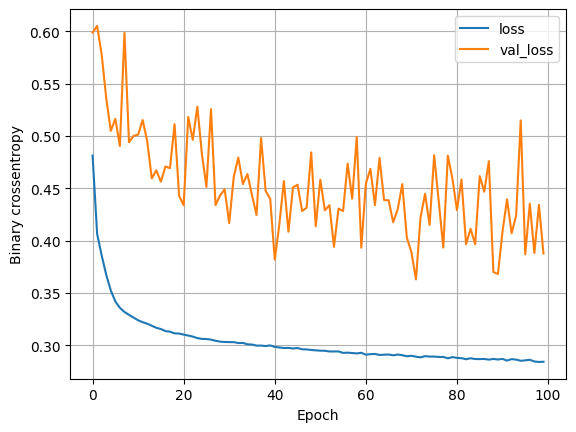

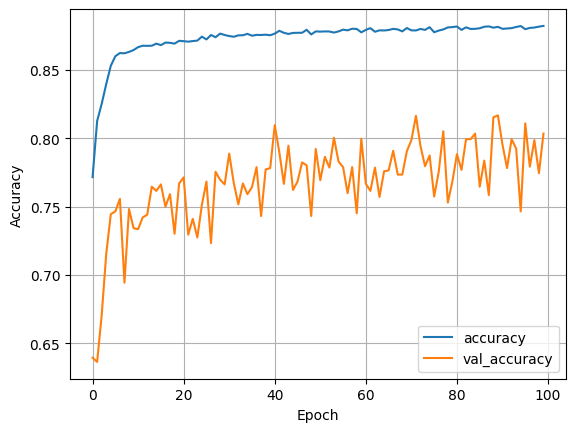

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8642 - loss: 0.3329
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.001, batch_size = 64


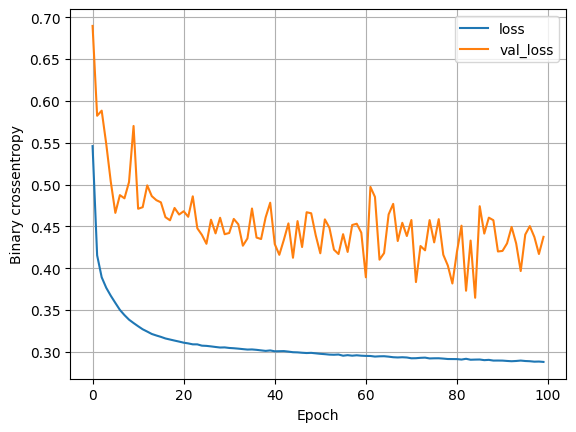

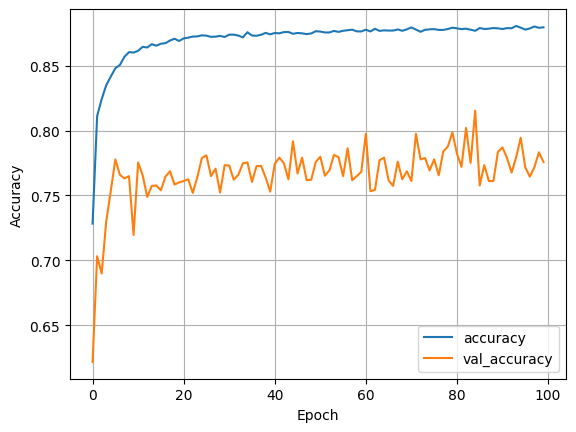

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8636 - loss: 0.3270
Num_nodes = 16, Dropout_prob = 0, learning_rate = 0.001, batch_size = 128


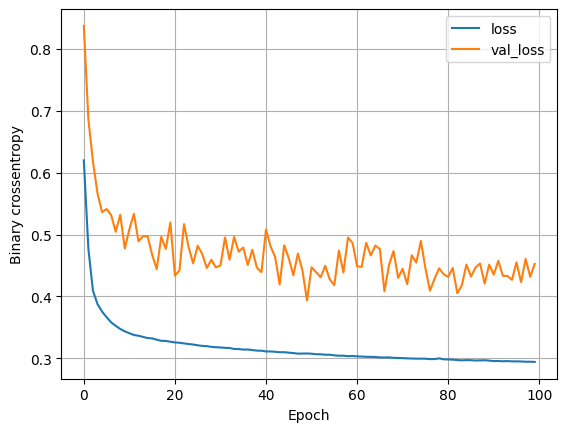

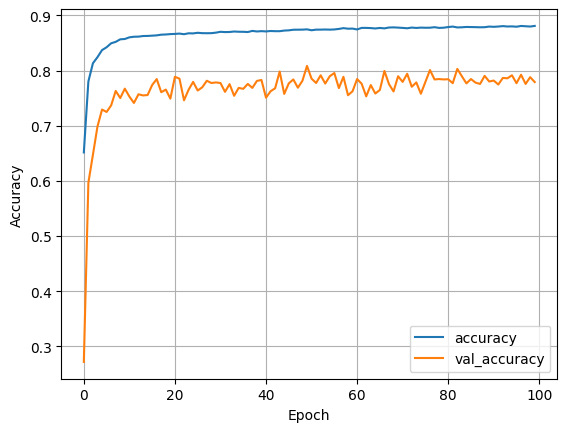

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3248
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 32


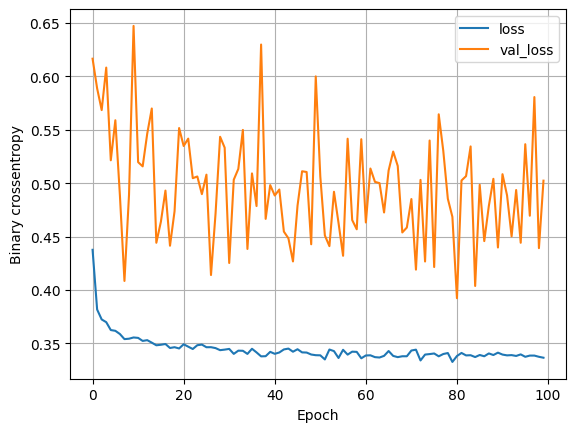

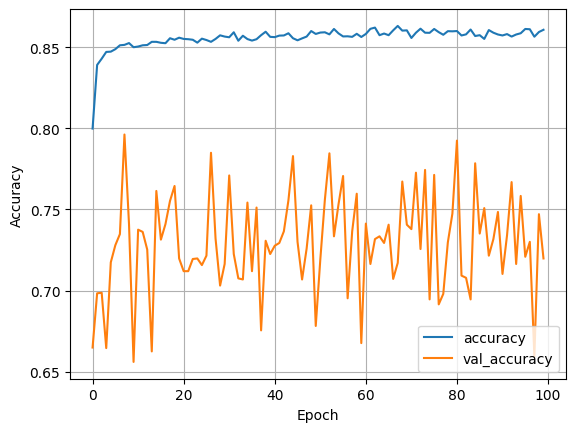

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.3297
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 64


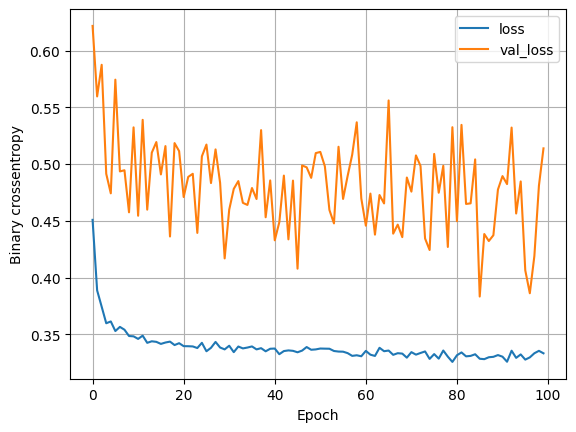

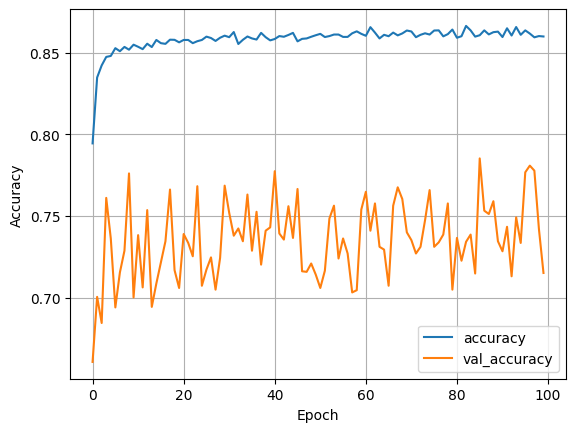

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8593 - loss: 0.3296
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 128


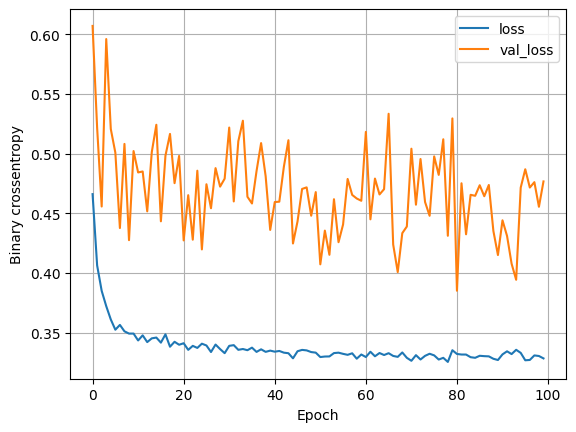

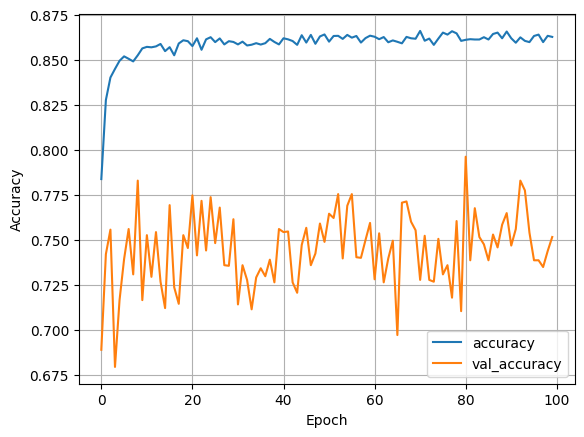

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3286
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 32


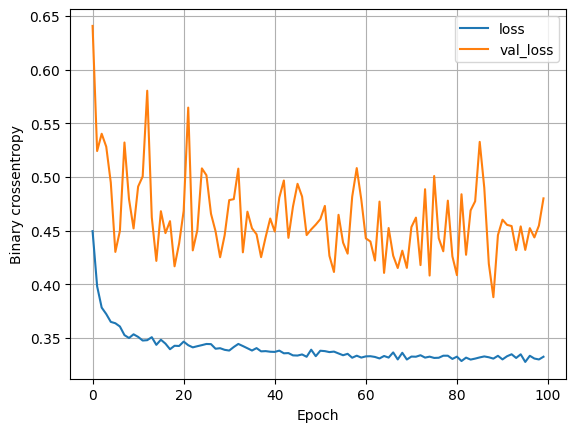

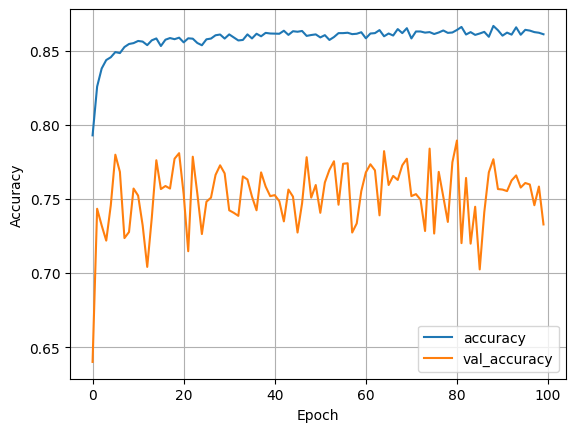

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8599 - loss: 0.3306
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 64


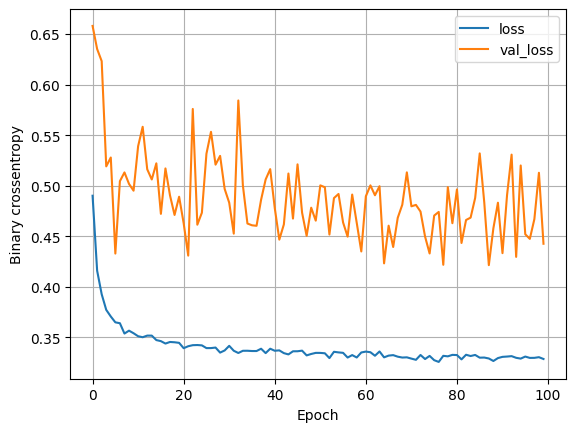

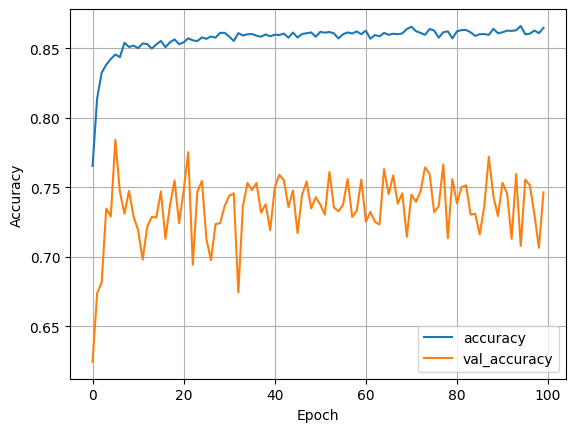

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3267
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 128


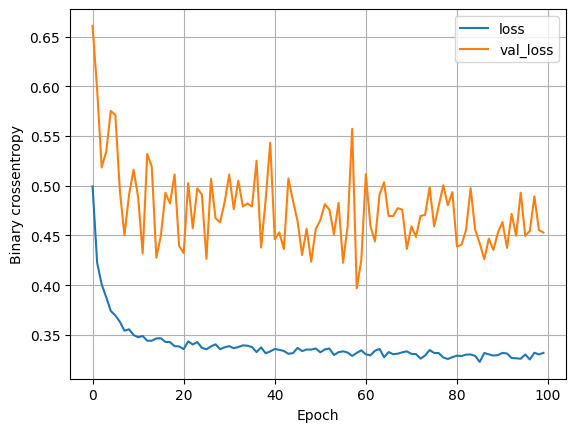

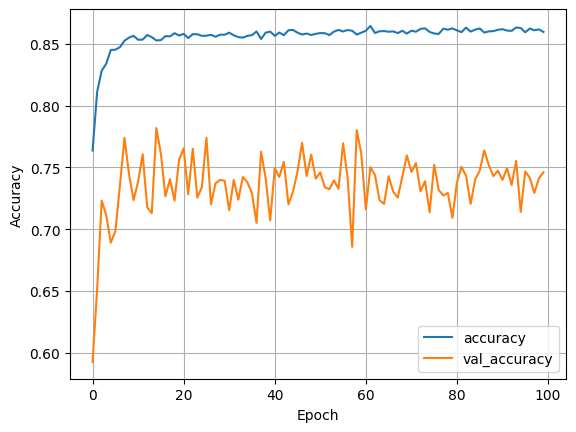

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8637 - loss: 0.3297
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 32


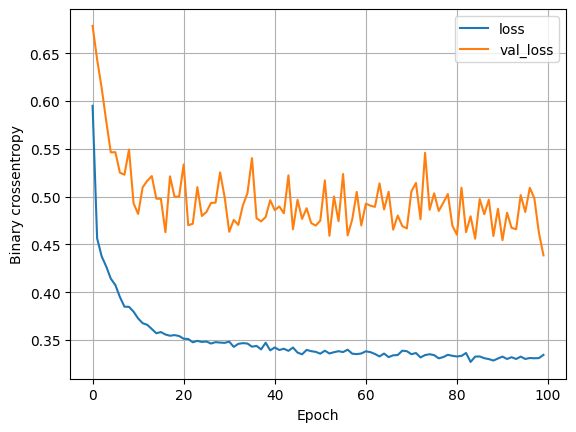

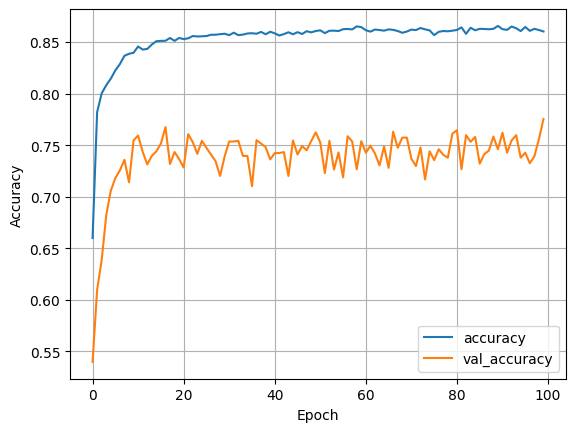

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8565 - loss: 0.3330
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 64


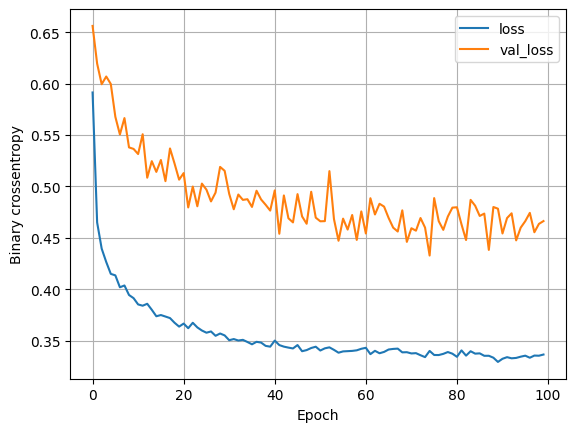

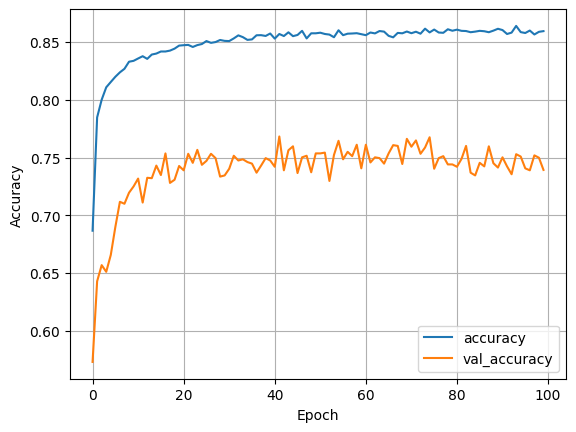

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3341
Num_nodes = 16, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 128


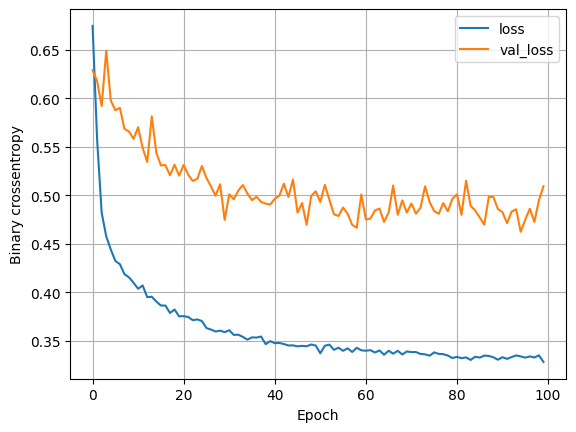

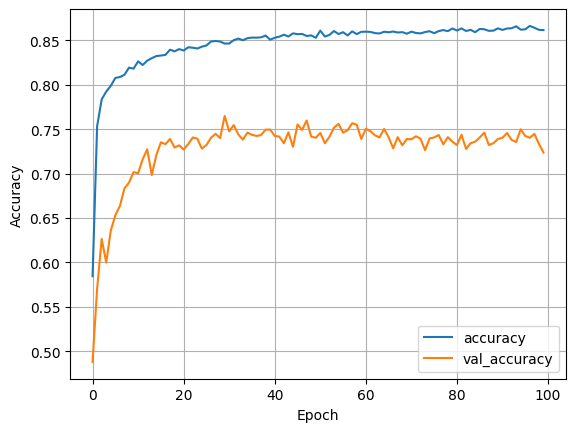

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8669 - loss: 0.3260
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.01, batch_size = 32


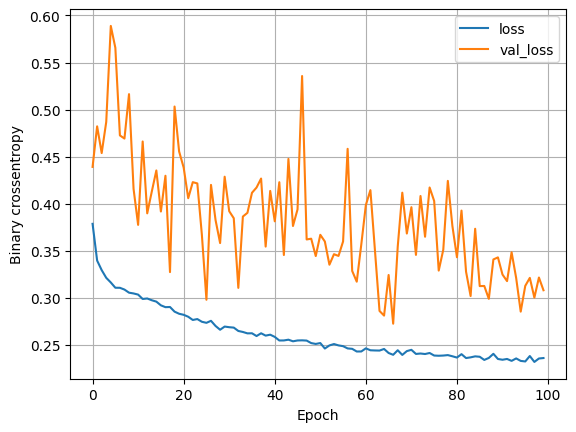

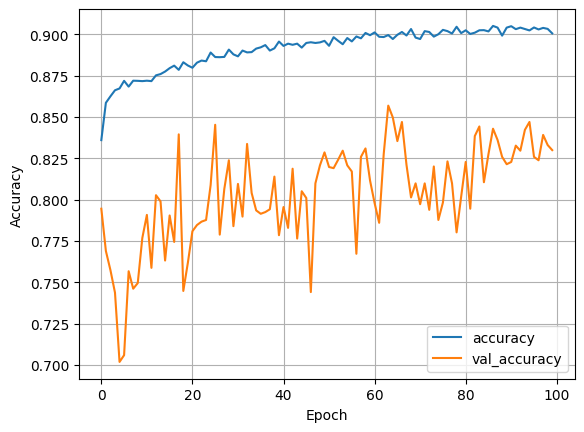

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.3923
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.01, batch_size = 64


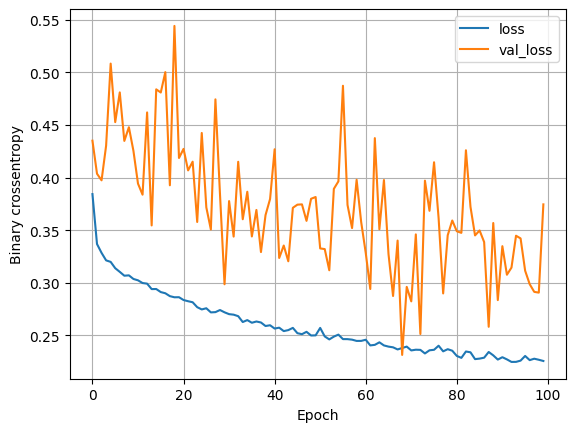

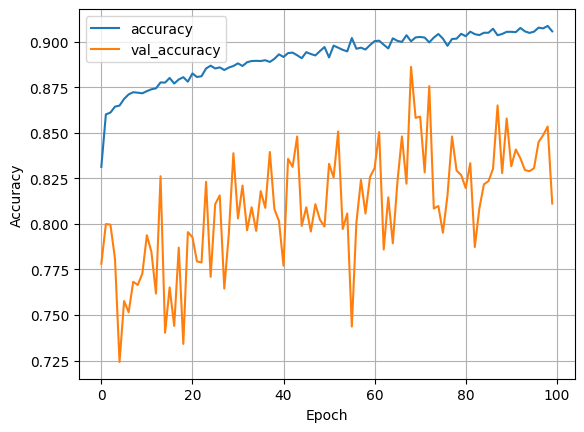

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8615 - loss: 0.3760
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.01, batch_size = 128


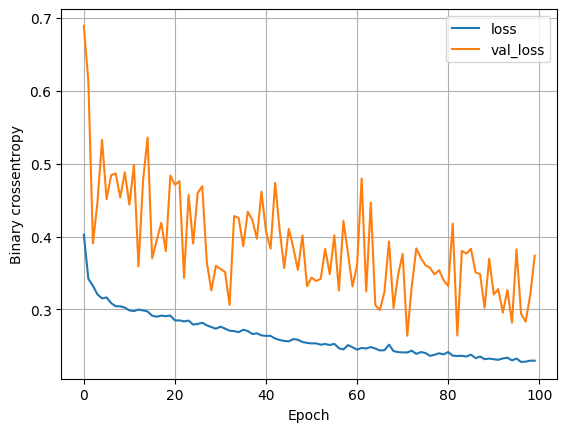

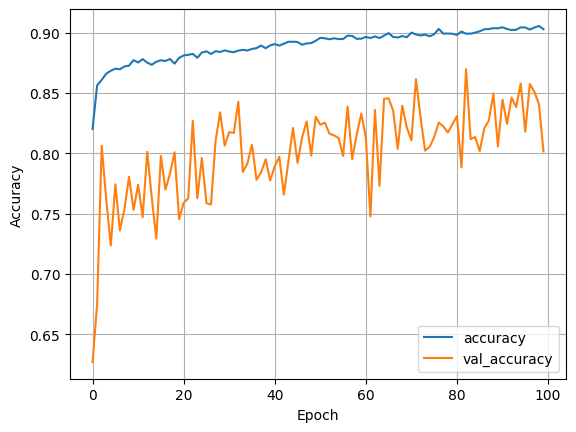

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8611 - loss: 0.3737
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.005, batch_size = 32


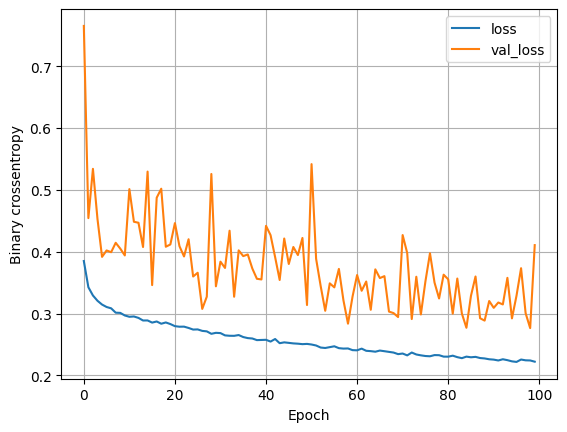

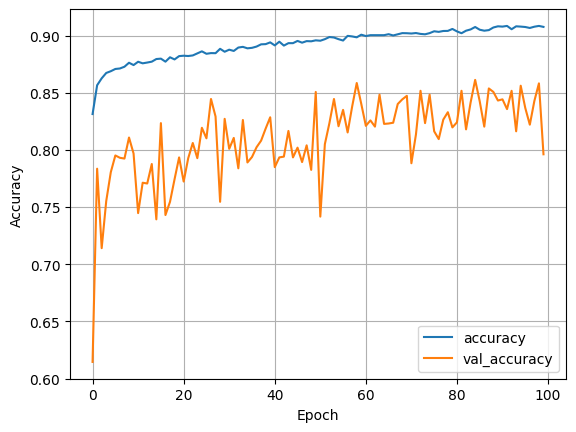

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3694
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.005, batch_size = 64


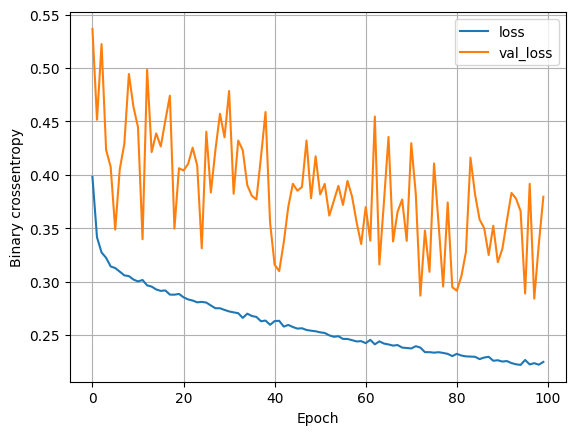

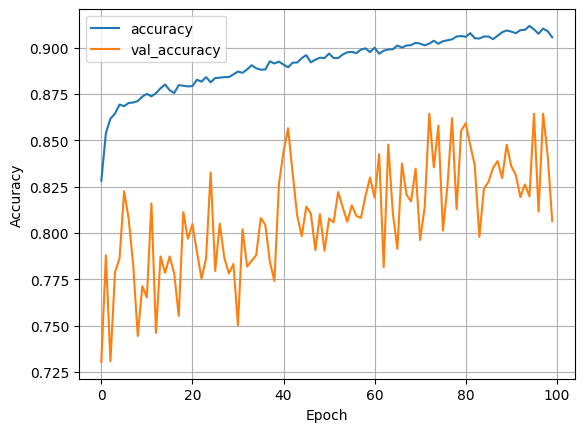

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8687 - loss: 0.3518
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.005, batch_size = 128


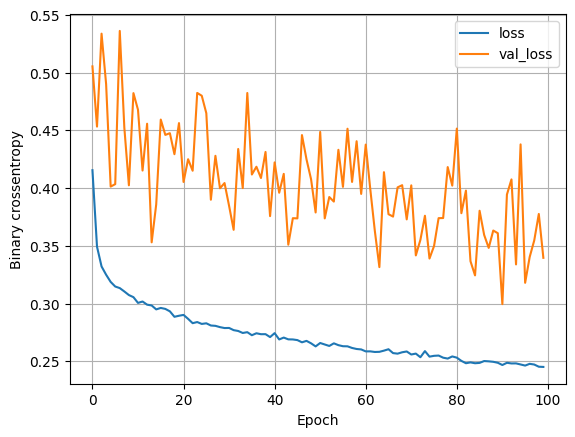

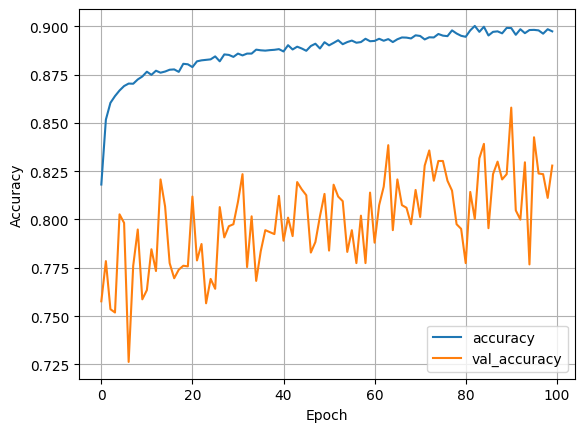

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8508 - loss: 0.3470
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.001, batch_size = 32


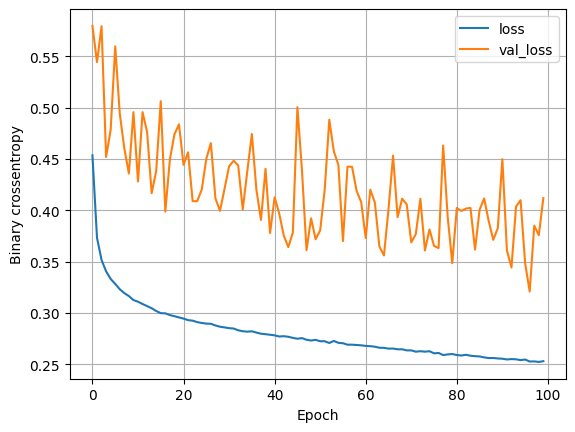

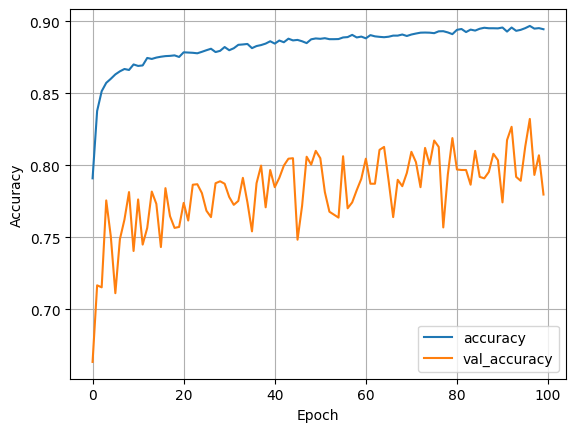

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8710 - loss: 0.3214
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.001, batch_size = 64


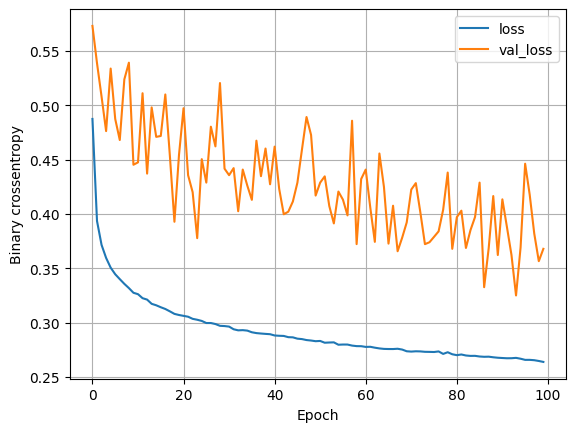

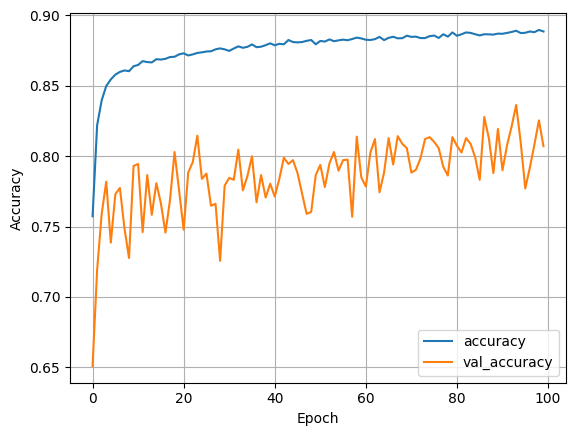

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3286
Num_nodes = 32, Dropout_prob = 0, learning_rate = 0.001, batch_size = 128


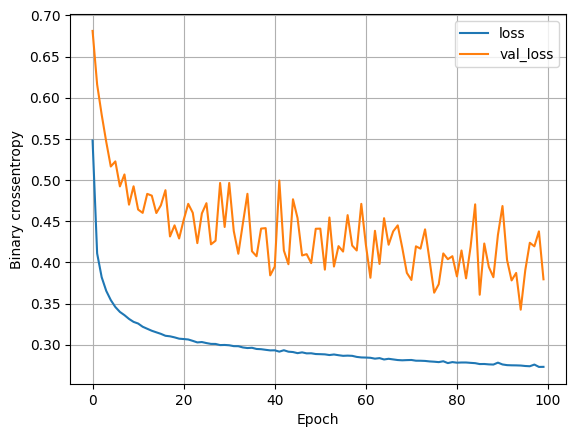

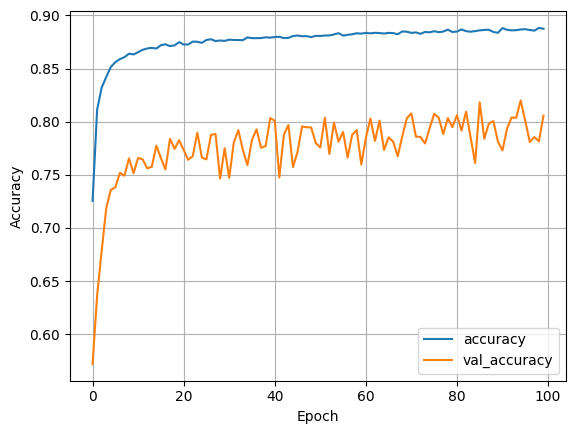

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8661 - loss: 0.3251
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 32


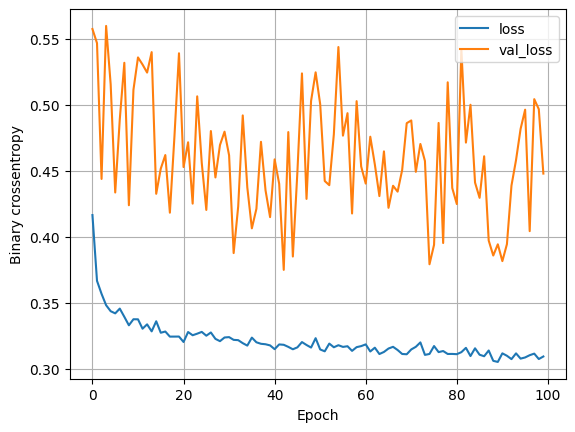

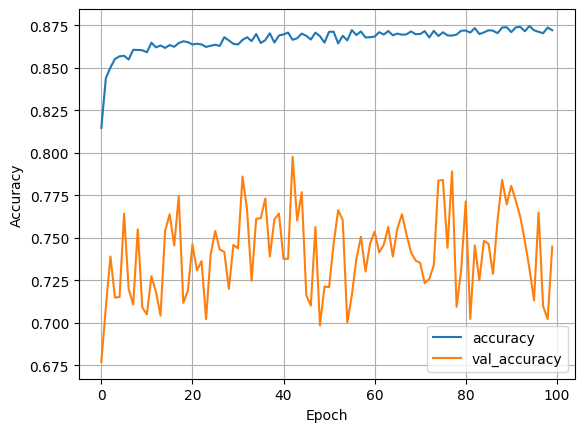

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.3271
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 64


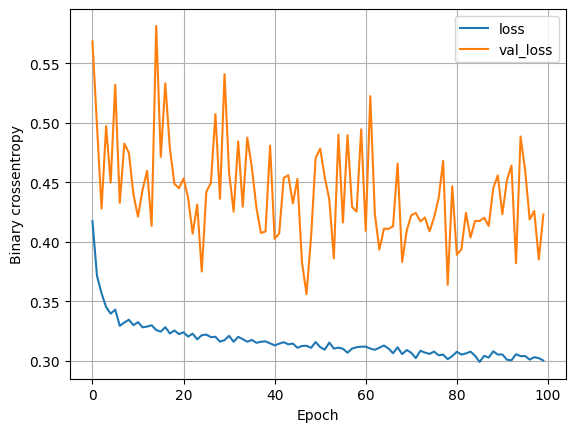

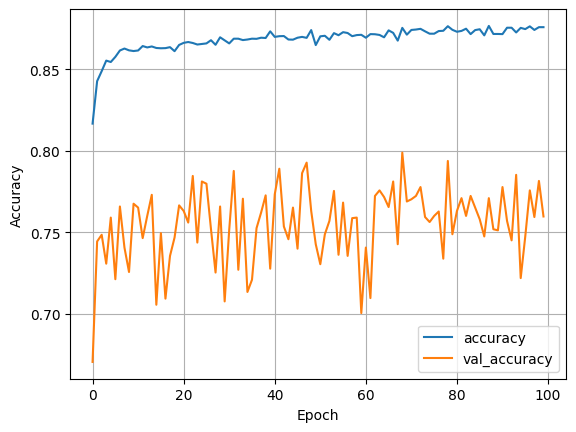

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8618 - loss: 0.3245
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 128


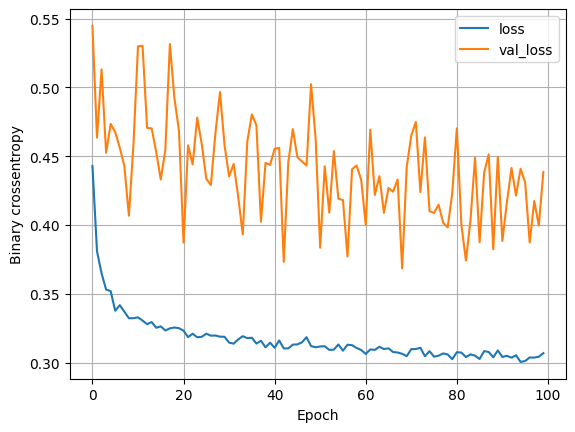

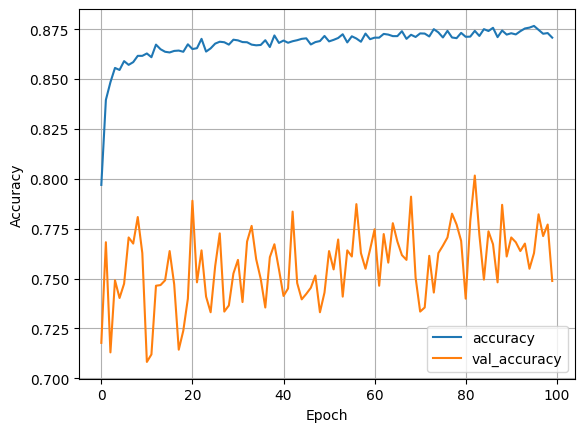

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8688 - loss: 0.3163
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 32


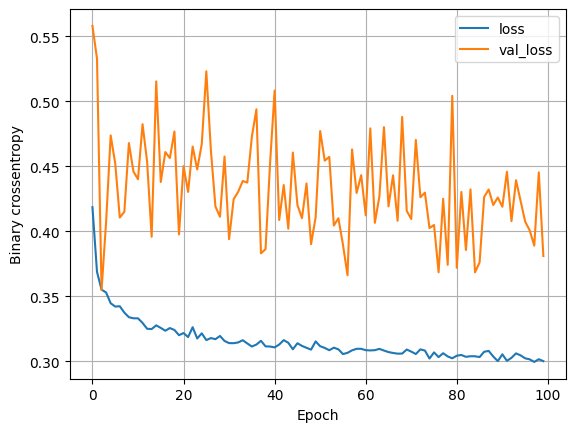

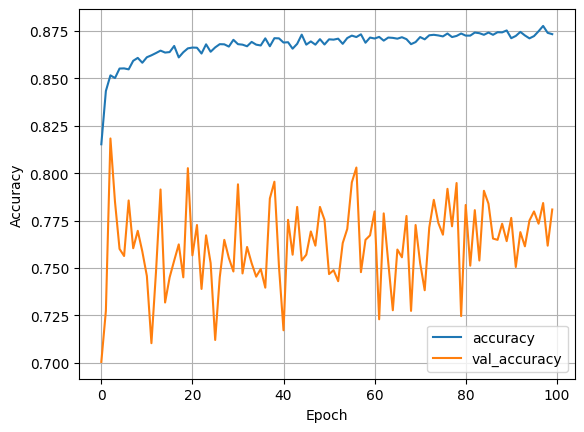

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8644 - loss: 0.3237
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 64


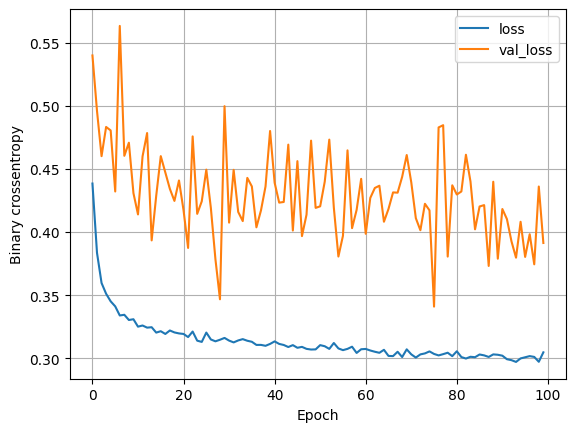

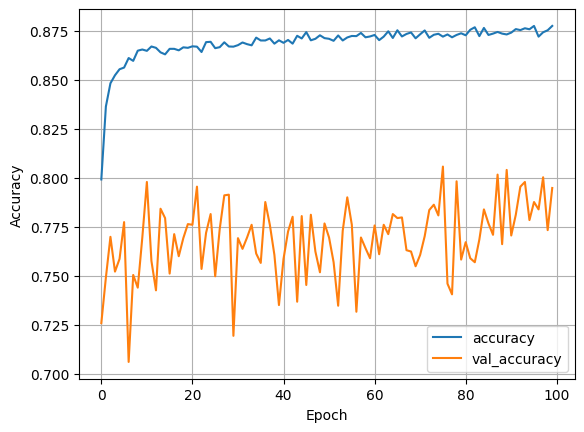

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8595 - loss: 0.3240
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 128


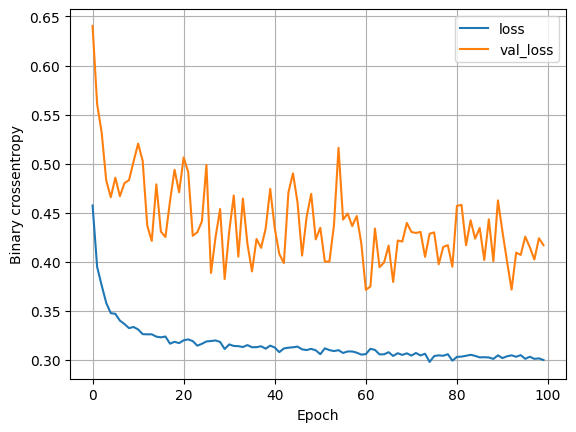

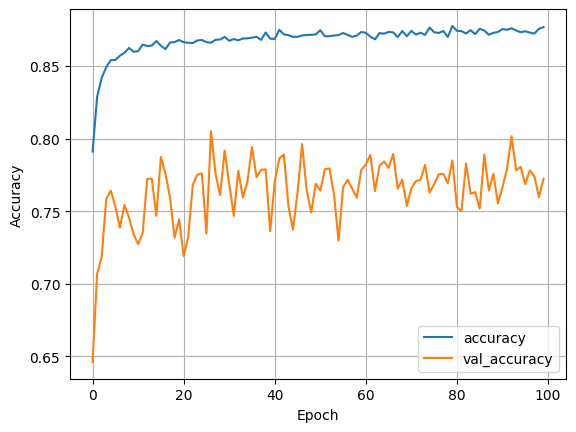

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8655 - loss: 0.3181
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 32


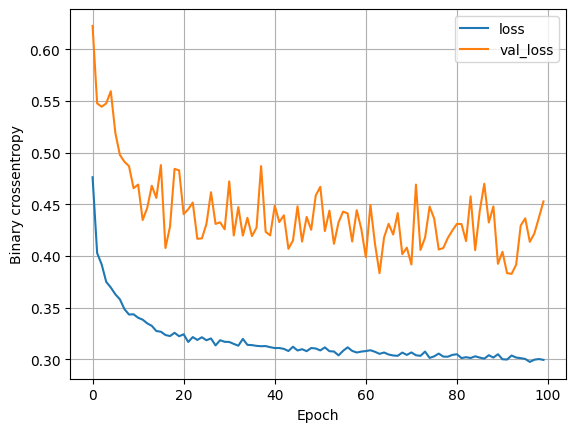

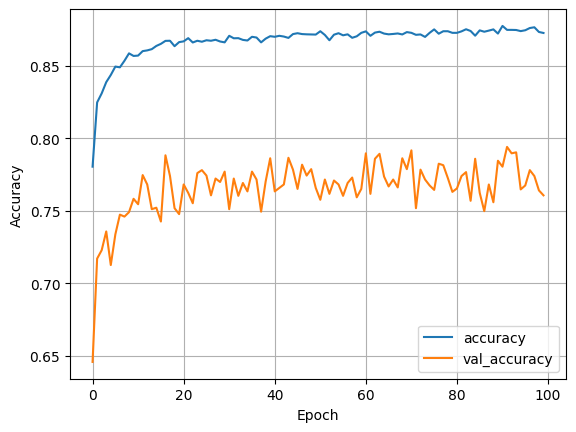

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3215
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 64


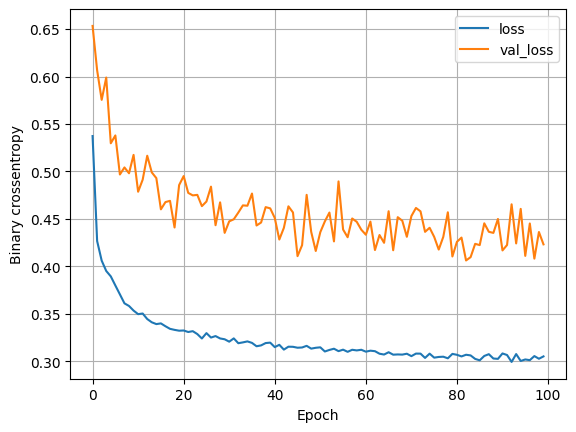

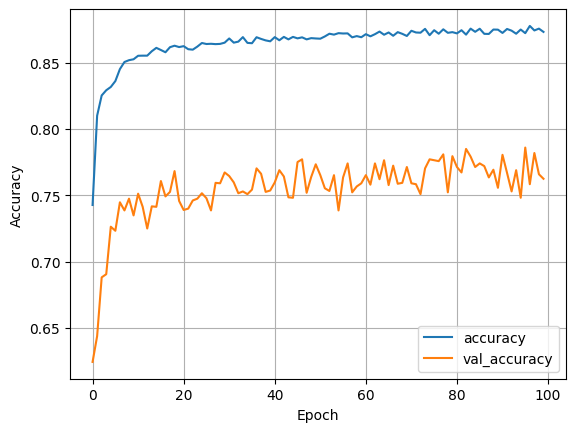

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3193
Num_nodes = 32, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 128


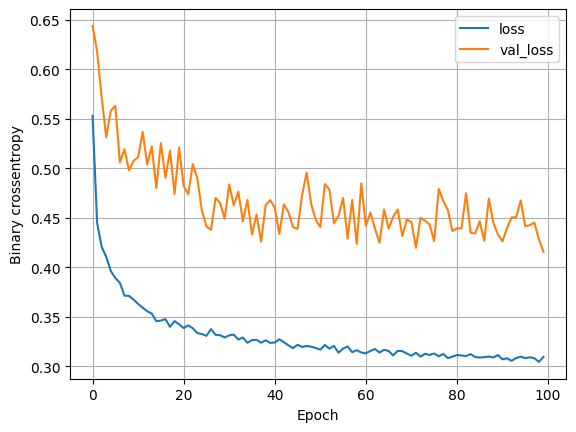

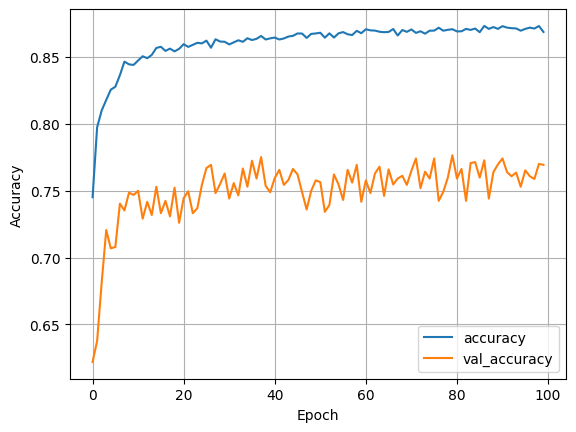

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8671 - loss: 0.3247
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.01, batch_size = 32


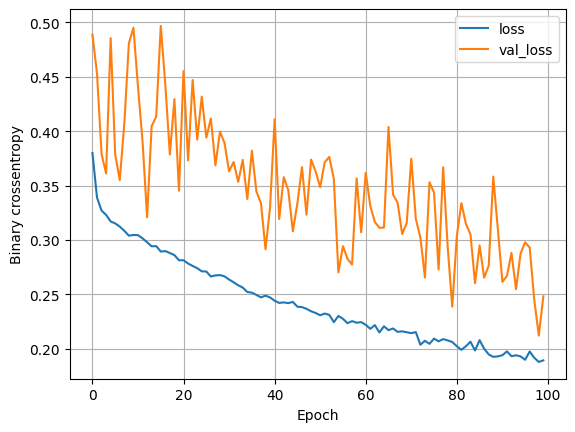

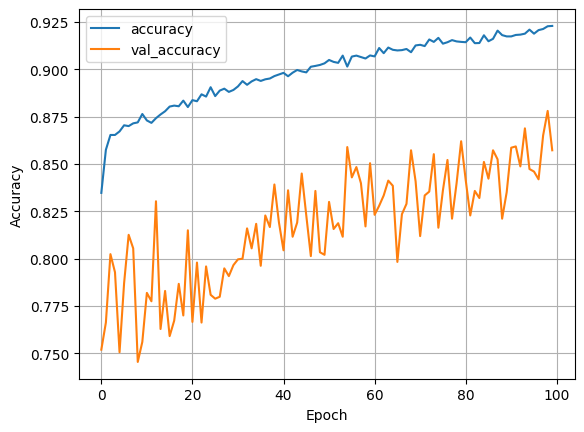

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.5238
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.01, batch_size = 64


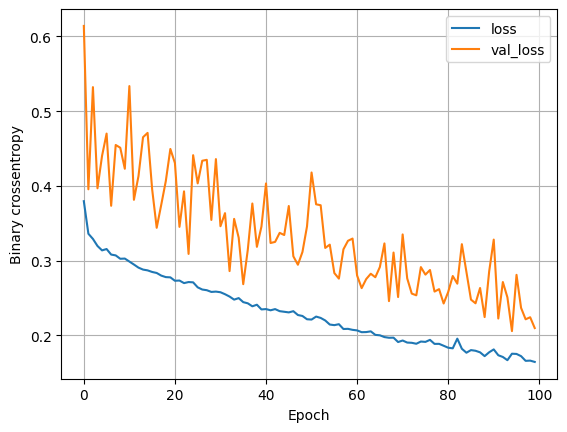

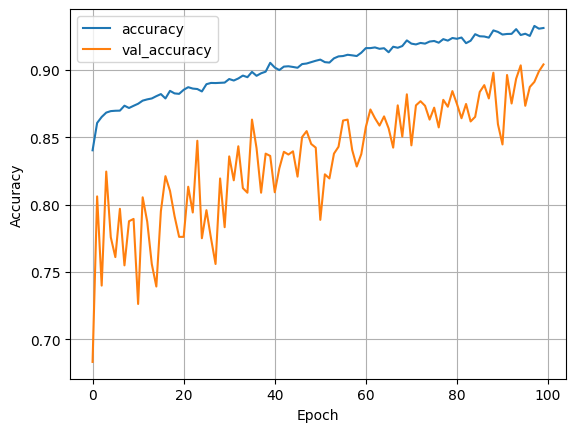

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.5840
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.01, batch_size = 128


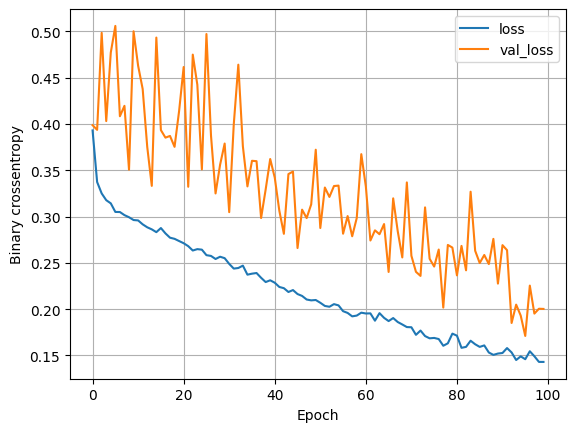

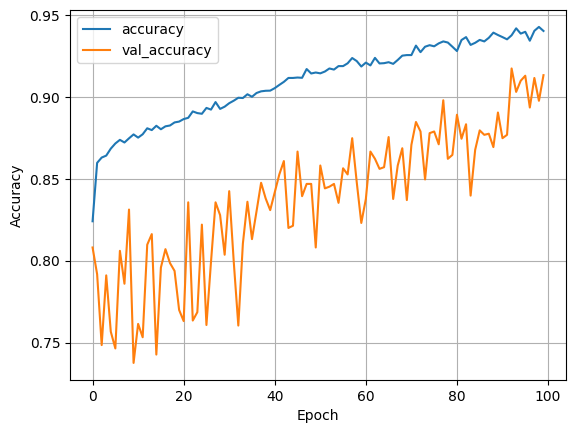

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8477 - loss: 0.5515
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.005, batch_size = 32


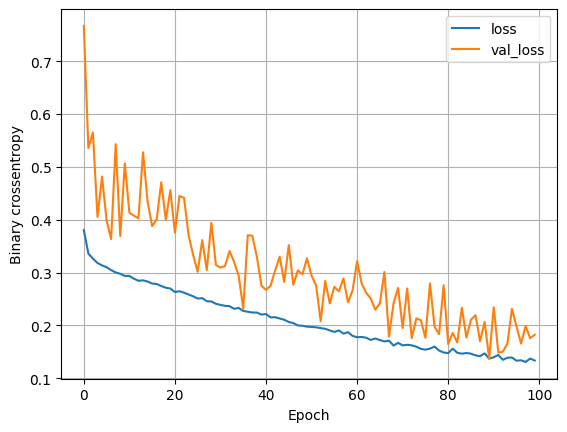

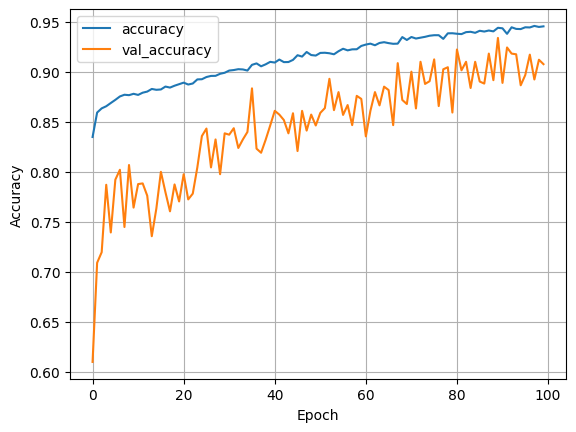

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.6594
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.005, batch_size = 64


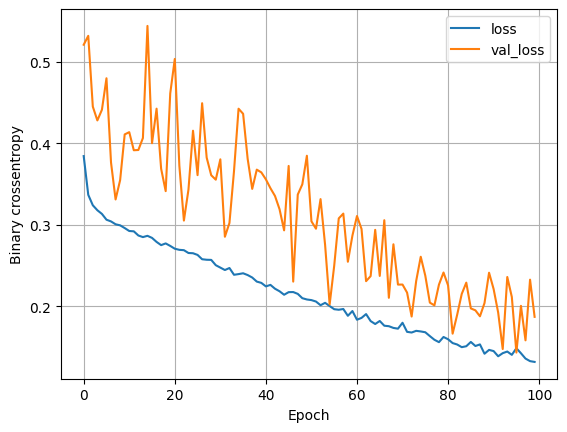

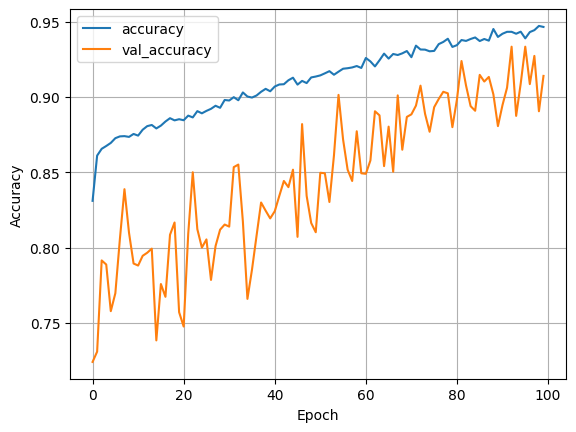

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.5591
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.005, batch_size = 128


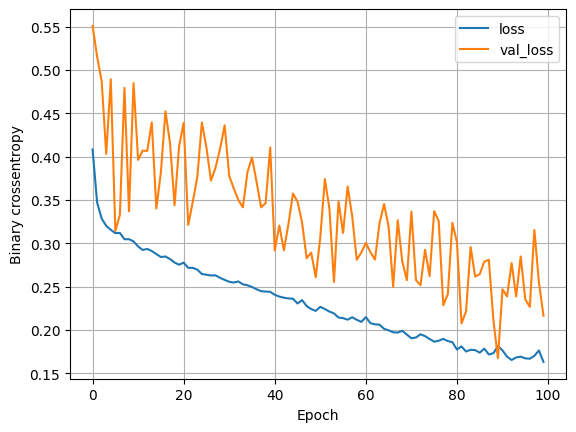

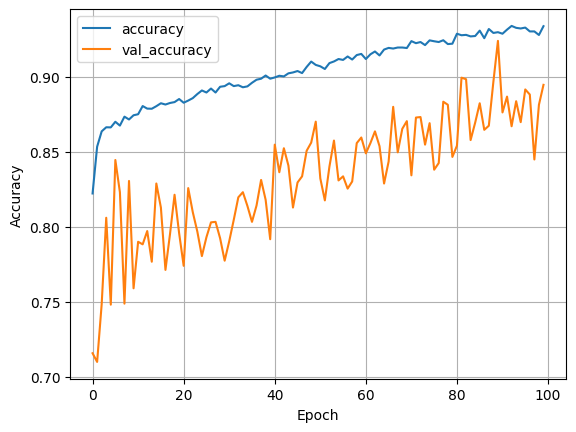

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8427 - loss: 0.4870
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.001, batch_size = 32


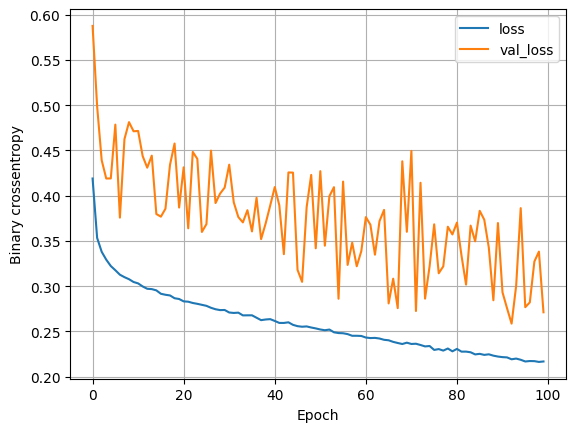

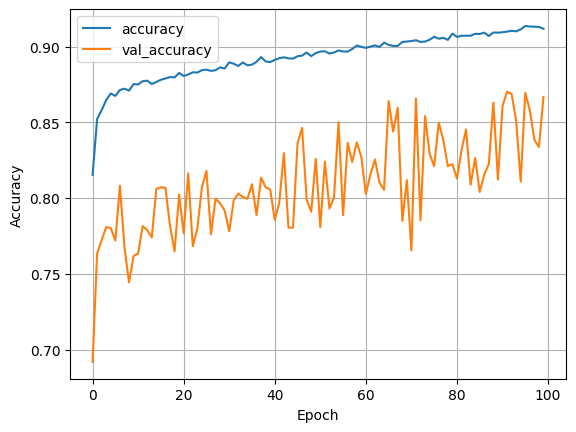

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.3644
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.001, batch_size = 64


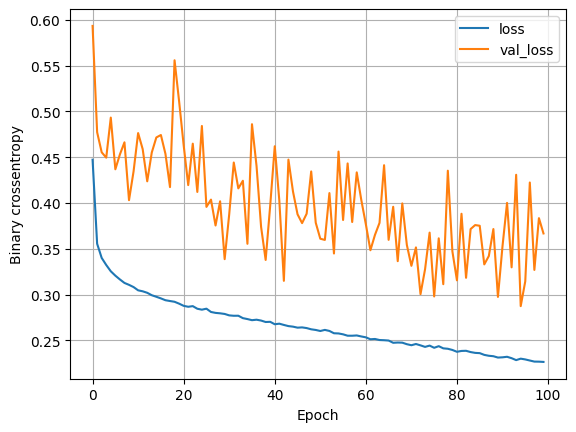

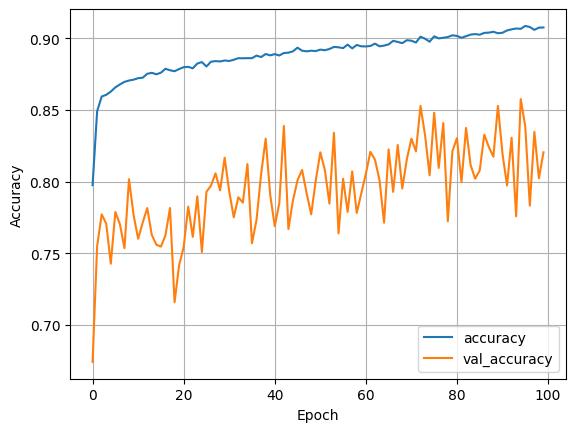

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3464
Num_nodes = 64, Dropout_prob = 0, learning_rate = 0.001, batch_size = 128


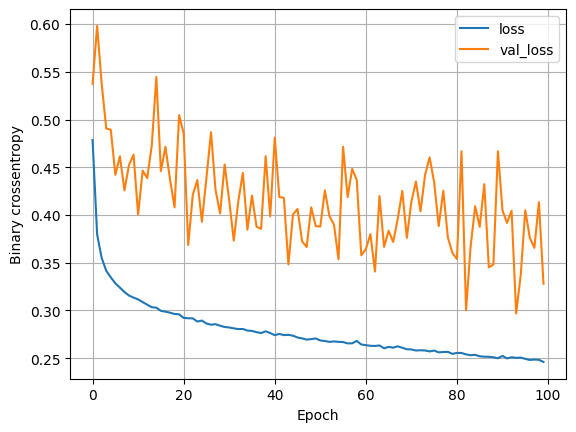

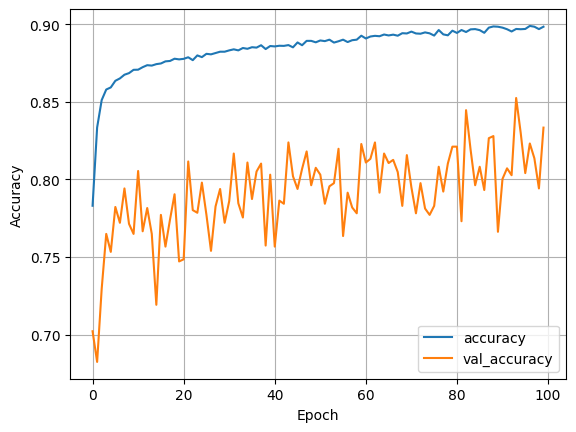

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8580 - loss: 0.3364
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 32


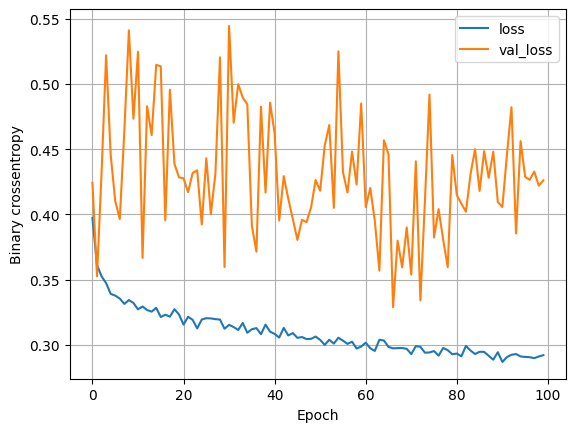

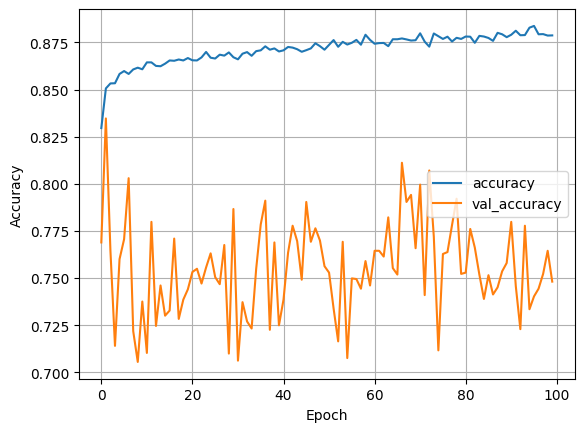

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8638 - loss: 0.3275
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 64


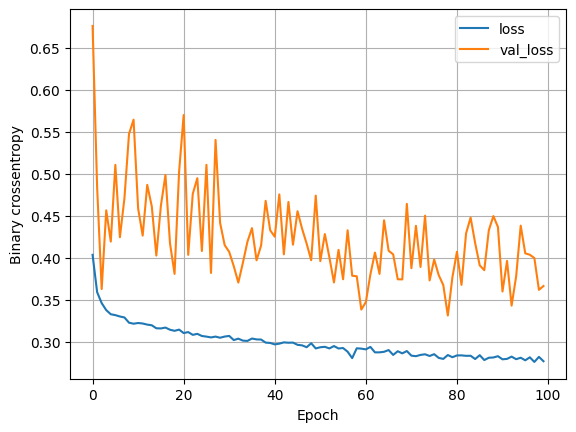

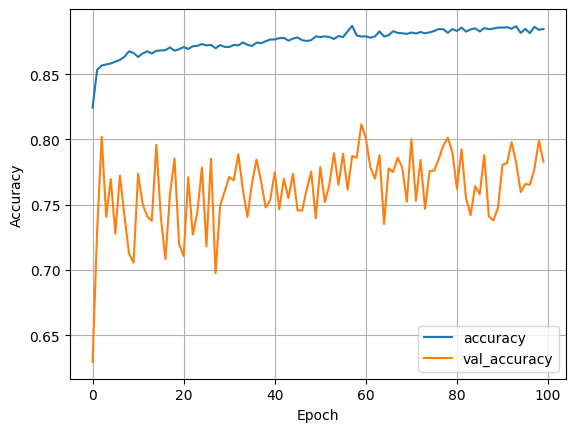

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8716 - loss: 0.3142
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.01, batch_size = 128


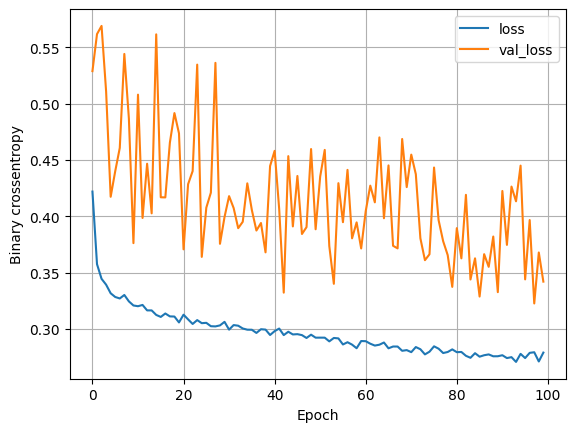

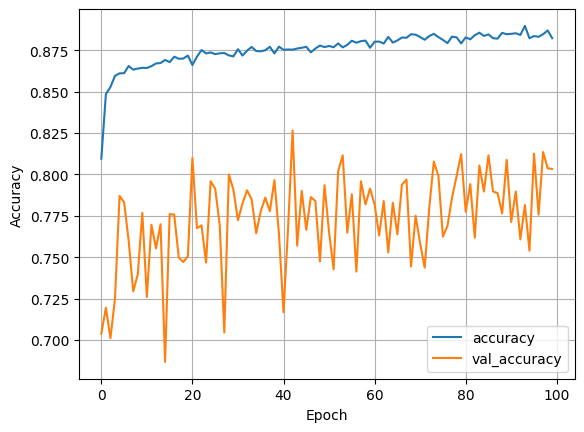

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8720 - loss: 0.3254
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 32


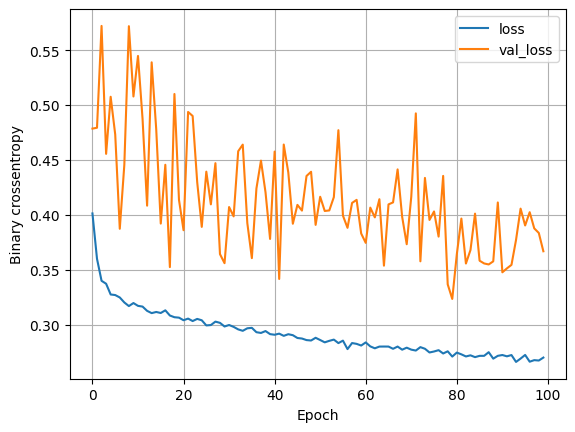

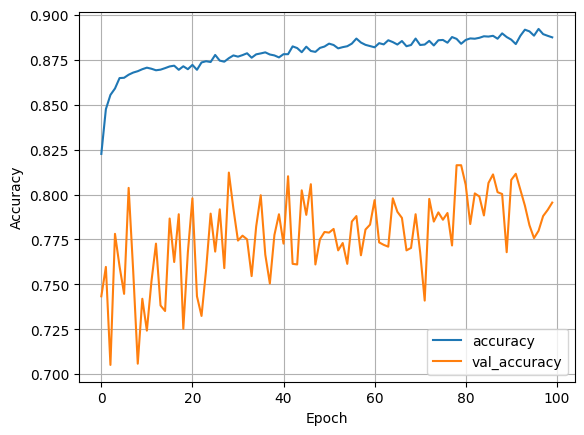

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8615 - loss: 0.3212
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 64


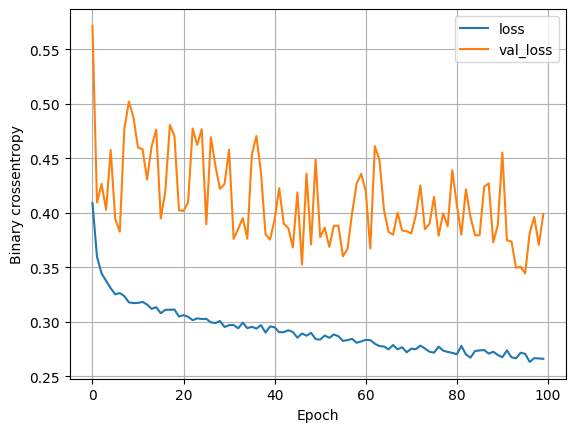

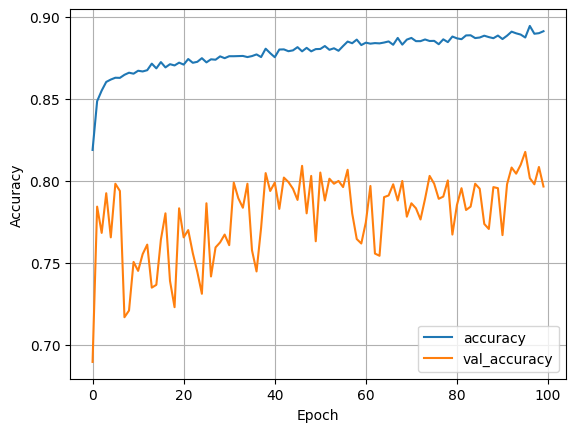

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3231
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.005, batch_size = 128


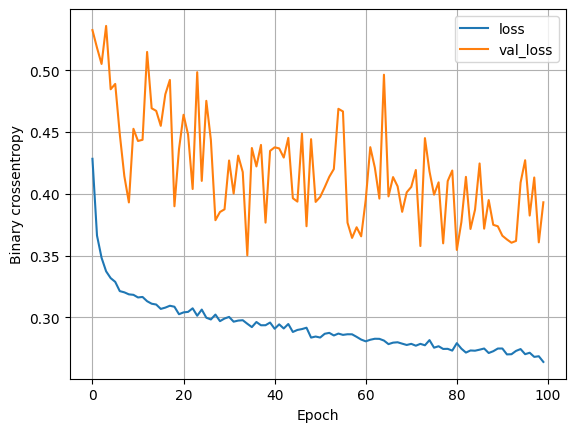

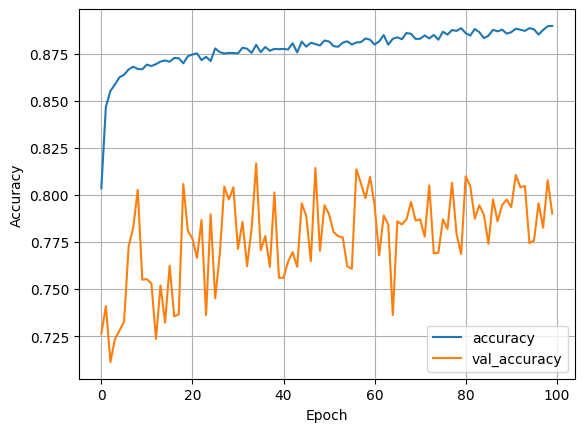

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.3112
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 32


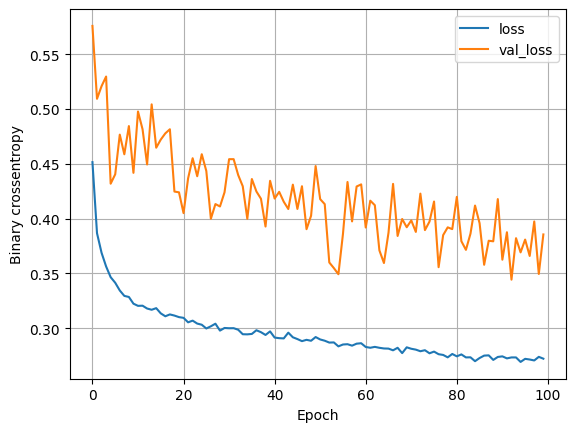

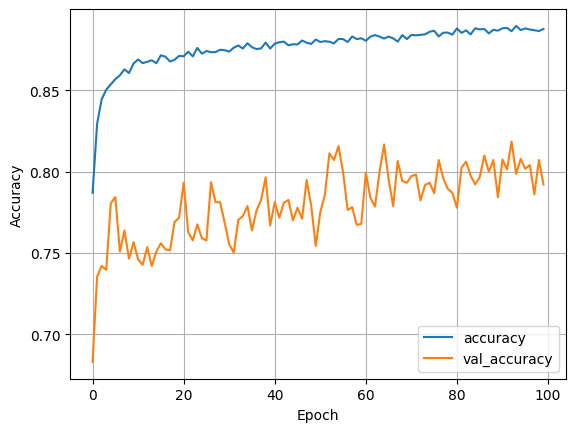

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3060
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 64


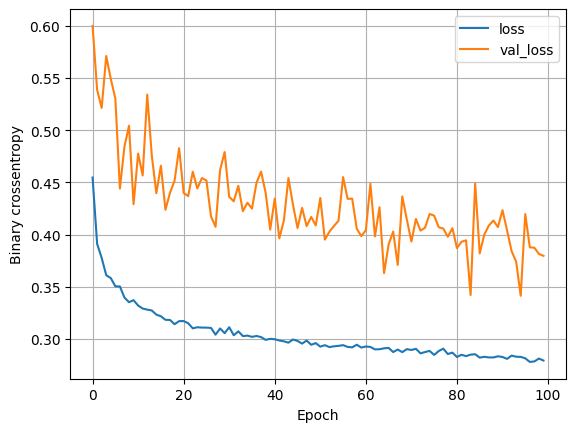

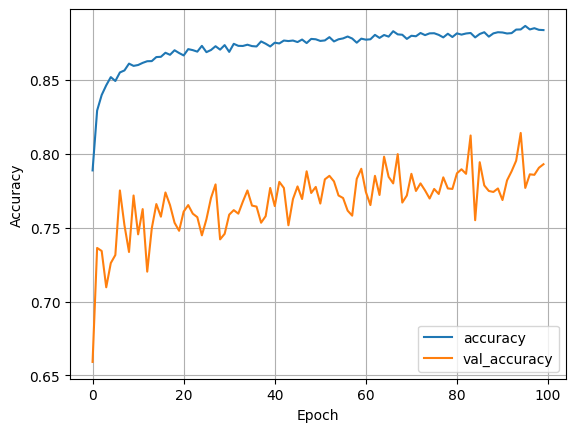

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8722 - loss: 0.3129
Num_nodes = 64, Dropout_prob = 0.2, learning_rate = 0.001, batch_size = 128


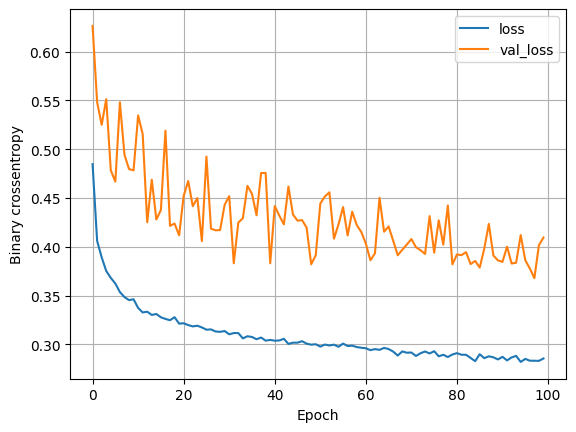

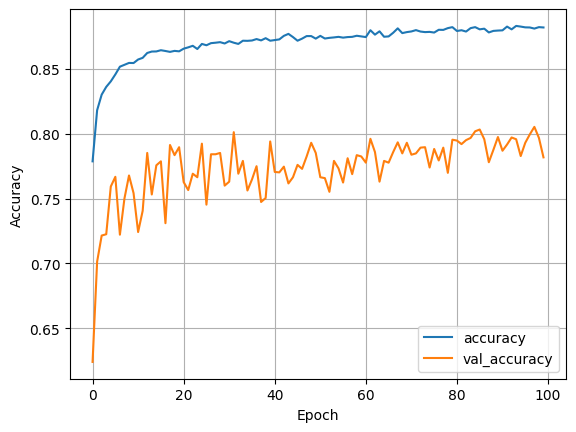

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3111


In [40]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        nn_model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        print(f"Num_nodes = {num_nodes}, Dropout_prob = {dropout_prob}, learning_rate = {learning_rate}, batch_size = {batch_size}")
        plot_loss(history)
        plot_accuracy(history)
        val_loss = nn_model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_loss_model = nn_model

In [41]:
#This will return a list of probabilities, unlike the previous built in models.
y_pred_probs = least_loss_model.predict(X_test)

#Use sigmoid with threshold=0.5 to convert to either 1 or 0 (Hadron or Gamma)
y_pred = (y_pred_probs >= 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1275
           1       0.88      0.94      0.91      2506

    accuracy                           0.88      3781
   macro avg       0.87      0.85      0.86      3781
weighted avg       0.88      0.88      0.88      3781

